We have provided two JSON datasets - one contains information on airport delays, and the other contains information on weather in cities. The goal of this take home question is to write code that will ingest these two datasets, join them together, and output a CSV which summarizes delays and weather for each city, by month. Once you have handled data ingestion & transformation, we'd like you to answer a few questions based on the data using code:

* Which city has the highest correlation between weather delays and rainfall?

* Which month has the highest correlation between weather delays and rainfall?

* See if you can find any other strong correlations between the climate data and airport delay data (does not have to be by rainfall, city, or month - whatever looks interesting to you!)

* Tell us your take-aways from this analysis

You are welcome to use any programming languages and frameworks that you feel will help you best solve this problem, just keep in mind that while the datasets we're providing you are static and fairly small, you should treat this as if you were creating a production-ready feature: we want to see your version of clean, reusable, scalable data processing code.

While working on your solution, please feel free to ask us any questions you might have in Slack - treat us as a remote team with a product owner who can clarify requirements, and engineering peers who you can bounce technical ideas off of.

In [1]:
## Un-comment to install packages
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling
# !pip install sklearn
# !pip install numpy

# An error can pop up the first time you run the imports regarding matplotlib, it is harmless and the developers have been working on it.

In [11]:
# packages used. An error can pop up the first time you run the notebook regarding matplotlib, it is harmless 
# and the developers have been working on it

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
from sklearn.preprocessing import Normalizer
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale=1.2)

In [3]:
# Importing our csv from the LTE notebook
all_info = pd.read_csv("./clean_airport_all.csv")

# Some EDA

In [4]:
eda1 = pd.DataFrame(all_info.groupby(by='time_year').count()).sort_values(by='month',ascending=False)

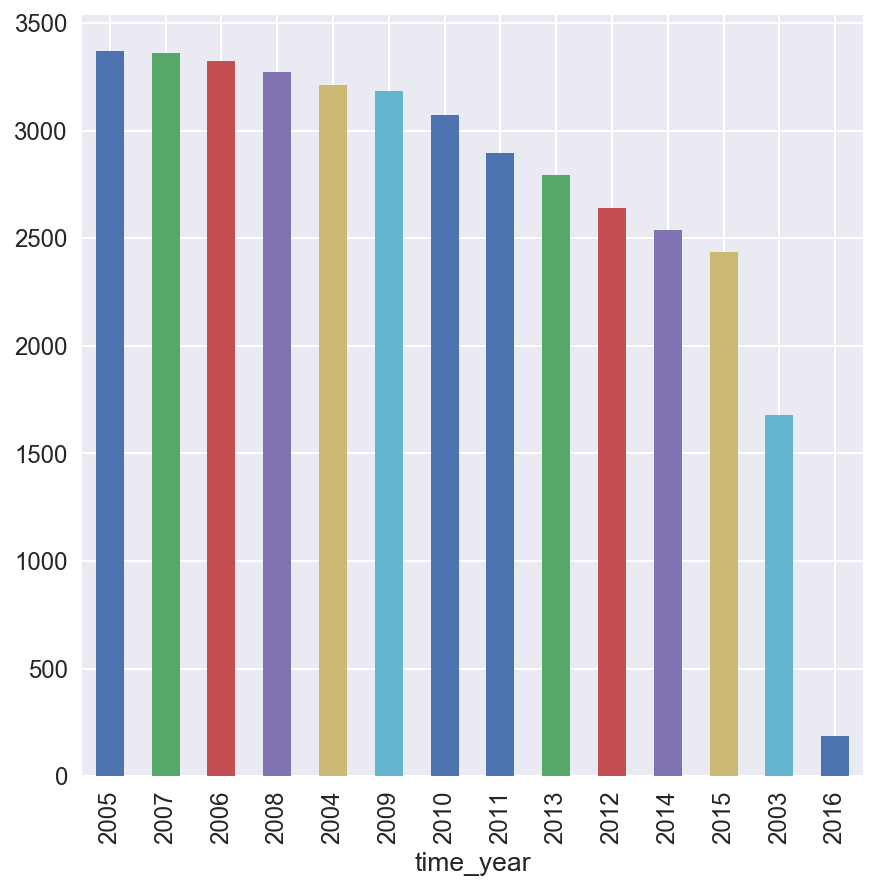

In [5]:
# plotting the number of records per year
eda1['month'].plot(kind='bar',figsize=(7,7));

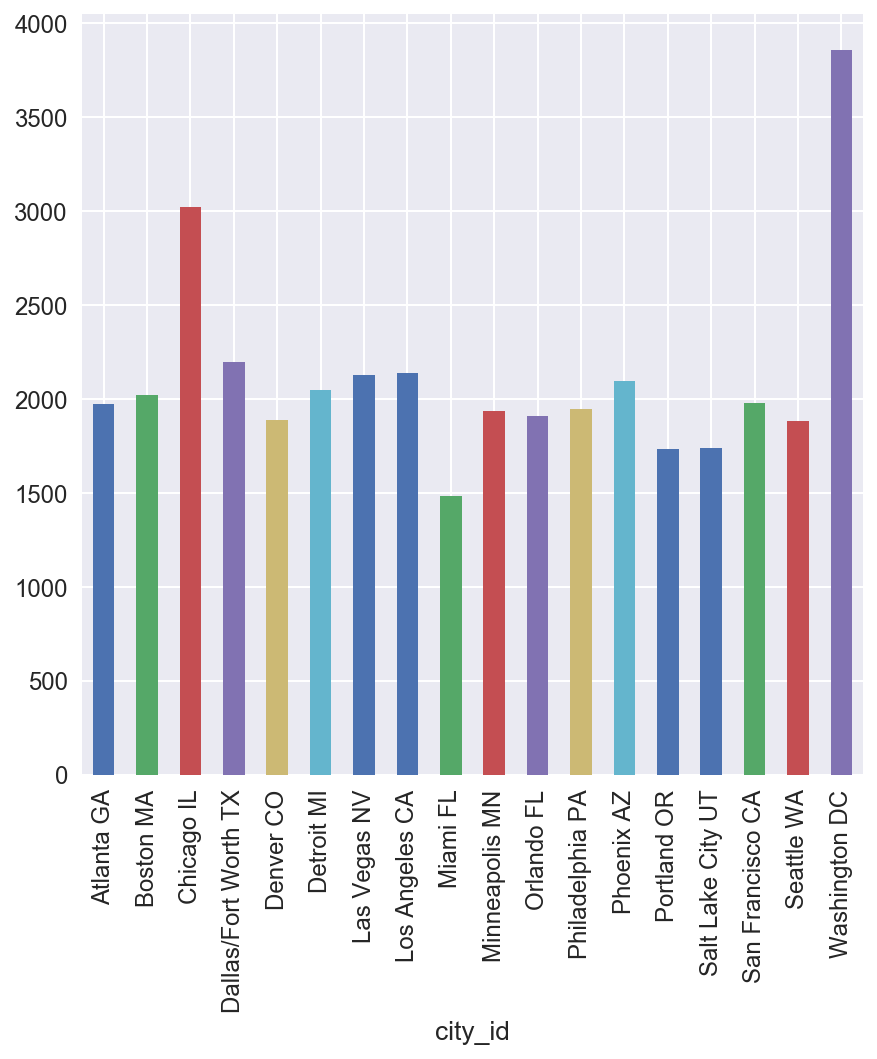

In [6]:
#count of weather delays per airport over 14 years
eda2 = all_info.groupby(by='city_id').count()
eda2['statistics_# of delays_weather'].plot(kind='bar',
                                           figsize = (7,7));

## The following section assumes that the climate data is a 14 year average

# Question 1: City with highest correlation to rainfall and weather delays

In [7]:
# we want to get the average delays per city and our average rainfall per city
avg_city = all_info.groupby(['city_id'],as_index=False).mean()

# extract out the city, weather delays and rainfall from the rest of the data
avg_city = avg_city[['city_id','statistics_# of delays_weather','rainfall']]

In [8]:
# now we need to change our city_id from string to numbers with one-hot encoding
avg_city = pd.get_dummies(data=avg_city, columns=['city_id'],prefix="city_of")

In [9]:
# next we want to normalize our numbers so the field is even
avg_norm = Normalizer().fit_transform(avg_city[['rainfall','statistics_# of delays_weather']])

In [10]:
# converting the normalized array into a dataframe
avg_norm = pd.DataFrame(avg_norm,columns=['rainfall','statistics_# of delays_weather'])

### now we need to combine to the 2 dataframes together so we can run a correlation on them. If we drop the original non-normalized rainfall and delays columns we can concat the 2 dataframes and run correlation

In [ ]:
# dropping columns and using concat to merge the dataframe, the concat matches on the index
avg_city = avg_city.drop(columns=['rainfall','statistics_# of delays_weather'])
city_corr = (pd.concat(
    objs=(avg_norm,avg_city),
    axis=1).corr(method='pearson')[['rainfall','statistics_# of delays_weather']])

In [ ]:
# correlation matrix of city vs rainfall and weather delays
city_corr

In [ ]:
# pearson correlation plot
city_corr.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7),
                      title = 'Pearson Correlation');

In [ ]:
# if we want only positive correlations we can filter out negative values
pos_city_corr = city_corr[(city_corr['rainfall'] > 0) & (city_corr['statistics_# of delays_weather'] > 0)]

pos_city_corr.sort_values(by='statistics_# of delays_weather')

In [ ]:
# finally, if we want to see the highest correlation we can take the absolute value of the correlations
abs_city_corr = city_corr.abs().sort_values(by='statistics_# of delays_weather')
abs_city_corr

In [ ]:
abs_city_corr.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7), title='Absolute Values of Pearson Correlation');

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(city_corr, 
                     ax=ax, 
                    )

# Set Title
plt.title("Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(pos_city_corr.sort_values(by='statistics_# of delays_weather'), 
                     ax=ax, 
                    )

# Set Title
plt.title("Positive Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(abs_city_corr, 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## The city with the highest correlation between rainfall and # of delays due to weather is:

* For Highest Positive Correlation: Salt Lake City, Utah
* For Highest Absolute Correlation: Las Vegas, Nevada

# Question 2: Month with highest correlation to rainfall and weather delays

In [ ]:
# we want to get the average delays per month over the 14 years and the average rainfall over all cities
avg_month = all_info.groupby(['month'],as_index=False).mean()

# extract out the month, weather delays and rainfall from the rest of the data
avg_month = avg_month[['month','statistics_# of delays_weather','rainfall']]

In [ ]:
# now we need to one-hot encode our months for the correlation
avg_month = pd.get_dummies(data=avg_month, columns=['month'],prefix="month_of")

In [ ]:
# next we want to normalize our numbers so the field range is even
avg_month_norm = Normalizer().fit_transform(avg_month[['statistics_# of delays_weather','rainfall']])

In [ ]:
# Turning the normalized data into a dadtaframe
avg_month_norm = pd.DataFrame(avg_month_norm,columns=['statistics_# of delays_weather','rainfall'])

### now we need to combine to the 2 dataframes together so we can run a correlation on them. If we drop the original non-normalized rainfall and delays columns we can concat the 2 dataframes and run correlation

In [ ]:
# using concat function to match dataframes on index
avg_month = avg_month.drop(columns=['statistics_# of delays_weather','rainfall'])
month_corr = pd.concat(objs=(avg_month_norm,avg_month),axis=1).corr(method='pearson')[['rainfall','statistics_# of delays_weather']]

In [ ]:
# correlation matrix of month vs rainfall and weather delays
month_corr

In [ ]:
month_corr.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7), title= 'Pearson Correlation');

In [ ]:
# if we want only positive correlations we can filter out negative values
pos_month_corr = month_corr[(month_corr['rainfall'] > 0) & (month_corr['statistics_# of delays_weather'] > 0)]

pos_month_corr.sort_values(by='statistics_# of delays_weather')

It looks like there isnt a positive correlation between any month to rainfall and weather delays

In [ ]:
# finally, if we want to see the highest correlation we can take the absolute value of the correlations
abs_month_corr = month_corr.abs()
abs_month_corr

In [ ]:
abs_month_corr.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7),
                      title='Absolute Values of Pearson Correlation');

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(month_corr, 
                     ax=ax, 
                    )

# Set Title
plt.title("Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(abs_month_corr.sort_values(by='statistics_# of delays_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## The month with the highest correlation between rainfall and # of delays due to weather is:

* For Highest Positive Correlation: None
* For Highest Absolute Correlation: January

# The following assumes the climate data is for the year of 2005 (or your choosing)

2005 was chosen as the analysis year as it had the most records

In [ ]:
# oy means "one year"
# replace 2005 with a year of your choosing
all_info_oy = all_info[all_info['time_year'] == 2005]

In [ ]:
#count of weather delays per airport over 1 year
eda4 = all_info_oy.groupby(by='city_id').count()
eda4['statistics_# of delays_weather'].plot(kind='bar',
                                           figsize = (7,7));

## Question 1: City with highest correlation to rainfall and weather delays

In [ ]:
# we want to get the average delays per city and our average rainfall per city
avg_city_oy = all_info_oy.groupby(['city_id'],as_index=False).mean()

# extract out the city, weather delays and rainfall from the rest of the data
avg_city_oy = avg_city_oy[['city_id','statistics_# of delays_weather','rainfall']]

In [ ]:
# now we need to change our city_id from string to numbers with one-hot encoding
avg_city_oy = pd.get_dummies(data=avg_city_oy, columns=['city_id'],prefix="city_of")

In [ ]:
# next we want to normalize our numbers so the field is even
avg_norm_oy = Normalizer().fit_transform(avg_city_oy[['rainfall','statistics_# of delays_weather']])

In [ ]:
# creating a dataframe from the normalized array
avg_norm_oy = pd.DataFrame(avg_norm_oy,columns=['rainfall','statistics_# of delays_weather'])

### now we need to combine to the 2 dataframes together so we can run a correlation on them. If we drop the original non-normalized rainfall and delays columns we can concat the 2 dataframes and run correlation

In [ ]:
# using concat to add the dataframes together using the index
avg_city_oy = avg_city_oy.drop(columns=['rainfall','statistics_# of delays_weather'])
city_corr_oy = (pd.concat(
    objs=(avg_norm_oy,avg_city_oy),
    axis=1).corr(method='pearson')[['rainfall','statistics_# of delays_weather']])

In [ ]:
# correlation matrix of city vs rainfall and weather delays
city_corr_oy

In [ ]:
city_corr_oy.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7),
                 title = 'Pearson Correlation');

In [ ]:
# if we want only positive correlations we can filter out negative values
pos_city_corr_oy = city_corr_oy[(city_corr_oy['rainfall'] > 0) & (city_corr_oy['statistics_# of delays_weather'] > 0)]

pos_city_corr_oy.sort_values(by='statistics_# of delays_weather')

Looks like there werent any positive correlations

In [ ]:
# finally, if we want to see the highest correlation we can take the absolute value of the correlations
abs_city_corr_oy = city_corr_oy.abs().sort_values(by='statistics_# of delays_weather')
abs_city_corr_oy

In [ ]:
abs_city_corr_oy.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7),
                      title='Absolute Values of Pearson Correlation');

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(city_corr_oy, 
                     ax=ax, 
                    )

# Set Title
plt.title("Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(abs_city_corr_oy, 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## The city with the highest correlation between rainfall and # of delays due to weather is:

* For Highest Positive Correlation: None
* For Highest Absolute Correlation: Las Vegas, Nevada (very strong relationship)

# Question 2: Month with highest correlation to rainfall and weather delays

In [ ]:
# we want to get the average delays per month over the 14 years and the average rainfall over all cities
avg_month_oy = all_info_oy.groupby(['month'],as_index=False).mean()

# extract out the month, weather delays and rainfall from the rest of the data
avg_month_oy = avg_month_oy[['month','statistics_# of delays_weather','rainfall']]

In [ ]:
# now we need to one-hot encode our months for the correlation
avg_month_oy = pd.get_dummies(data=avg_month_oy, columns=['month'],prefix="month_of")

In [ ]:
# next we want to normalize our numbers so the field range is even
avg_month_norm_oy = Normalizer().fit_transform(avg_month_oy[['statistics_# of delays_weather','rainfall']])

In [ ]:
# Turning the normalized data into a dadtaframe
avg_month_norm_oy = pd.DataFrame(avg_month_norm_oy,columns=['statistics_# of delays_weather','rainfall'])

### now we need to combine to the 2 dataframes together so we can run a correlation on them. If we drop the original non-normalized rainfall and delays columns we can concat the 2 dataframes and run correlation

In [ ]:
avg_month_oy = avg_month_oy.drop(columns=['statistics_# of delays_weather','rainfall'])
month_corr_oy = pd.concat(objs=(avg_month_norm_oy,avg_month_oy),axis=1).corr(method='pearson')[['rainfall','statistics_# of delays_weather']]

In [ ]:
# correlation matrix of month vs rainfall and weather delays
month_corr_oy

In [ ]:
month_corr_oy.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7),title='Pearson Correlation');

In [ ]:
# if we want only positive correlations we can filter out negative values
pos_month_corr_oy = month_corr_oy[(month_corr_oy['rainfall'] > 0) & (month_corr_oy['statistics_# of delays_weather'] > 0)]

pos_month_corr_oy.sort_values(by='statistics_# of delays_weather')

In [ ]:
# finally, if we want to see the highest correlation we can take the absolute value of the correlations
abs_month_corr_oy = month_corr_oy.abs()
abs_month_corr_oy

In [ ]:
abs_month_corr_oy.plot(x='statistics_# of delays_weather',
                      y='rainfall',
                      kind='scatter',
                      figsize=(7,7),
                      title='Absolute Values of Pearson Correlation');

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(month_corr_oy, 
                     ax=ax, 
                    )

# Set Title
plt.title("Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(pos_month_corr_oy.sort_values(by='statistics_# of delays_weather'), 
                     ax=ax, 
                    )

# Set Title
plt.title("Positive Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(abs_month_corr.sort_values(by='statistics_# of delays_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## The month with the highest correlation between rainfall and # of delays due to weather is:

* For Highest Positive Correlation: August. Not statistically significant, nearly a zero correlation
* For Highest Absolute Correlation: January


# Question 3: See if you can find any other strong correlations between the climate data and airport delay data

After looking at the rainfall, I wanted to look at the snow, low temperature and hourly delays per city

In [ ]:
# we want to get the average delays per city and our average low per city
avg_low_oy = all_info_oy.groupby(['city_id'],as_index=False).mean()

# extract out the city, weather delays and low from the rest of the data
avg_low_oy = avg_low_oy[['city_id','statistics_# of delays_weather','low']]

# now we need to change our city_id from string to numbers with one-hot encoding
avg_low_oy = pd.get_dummies(data=avg_low_oy, columns=['city_id'],prefix="city_of")

# next we want to normalize our numbers so the field is even
avg_norm_low_oy = Normalizer().fit_transform(avg_low_oy[['low','statistics_# of delays_weather']])

avg_norm_low_oy = pd.DataFrame(avg_norm_low_oy,columns=['low','statistics_# of delays_weather'])

In [ ]:
avg_low_oy = avg_low_oy.drop(columns=['low','statistics_# of delays_weather'])
city_corr_low_oy = (pd.concat(
    objs=(avg_norm_low_oy,avg_low_oy),
    axis=1).corr(method='pearson')[['low','statistics_# of delays_weather']])

In [ ]:
city_corr_low_oy.sort_values(by='statistics_# of delays_weather',ascending=False)

In [ ]:
abs(city_corr_low_oy).sort_values(by='statistics_# of delays_weather',ascending=False)

In [ ]:
city_corr_low_oy.plot(x='statistics_# of delays_weather',
                      y='low',
                      kind='scatter',
                      figsize=(7,7),
                      title='Pearson Correlation');

In [ ]:
abs(city_corr_low_oy).plot(x='statistics_# of delays_weather',
                      y='low',
                      kind='scatter',
                      figsize=(7,7),
                      title='Absolute Values of Pearson Correlation');

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(city_corr_low_oy.sort_values(by='statistics_# of delays_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(abs(city_corr_low_oy).sort_values(by='statistics_# of delays_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## Low temperatures and weather delays:
* For Highest Positive Corelation: None
* For Highest Absolute Correlation: Denver, CO

# Looking at correlation between SnowDays and Weather Delay

In [ ]:
# we want to get the average delays per city and our average snow per city
avg_snow_oy = all_info_oy.groupby(['city_id'],as_index=False).mean()

# extract out the city, weather delays and snow from the rest of the data
avg_snow_oy = avg_snow_oy[['city_id','statistics_# of delays_weather','snowDays']]

# now we need to change our city_id from string to numbers with one-hot encoding
avg_snow_oy = pd.get_dummies(data=avg_snow_oy, columns=['city_id'],prefix="city_of")

# next we want to normalize our numbers so the field is even
avg_norm_snow_oy = Normalizer().fit_transform(avg_snow_oy[['snowDays','statistics_# of delays_weather']])

avg_norm_snow_oy = pd.DataFrame(avg_norm_snow_oy,columns=['snowDays','statistics_# of delays_weather'])

# using the concat funciton to merge dataframes on index
avg_snow_oy = avg_snow_oy.drop(columns=['snowDays','statistics_# of delays_weather'])
city_corr_snow_oy = (pd.concat(
    objs=(avg_norm_snow_oy,avg_snow_oy),
    axis=1).corr(method='pearson')[['snowDays','statistics_# of delays_weather']])

In [ ]:
city_corr_snow_oy.sort_values(by='statistics_# of delays_weather',ascending=False)

In [ ]:
abs(city_corr_snow_oy).sort_values(by='statistics_# of delays_weather',ascending=False)

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(city_corr_snow_oy.sort_values(by='statistics_# of delays_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(abs(city_corr_snow_oy).sort_values(by='statistics_# of delays_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## Snowfall and weather delays:
* For Highest Positive Corelation: Washington DC (very small)
* For Highest Absolute Correlation: Minneapolis, MN

## Correlation between Hours Delayed From Weather and Rainfall per city

In [ ]:
avg_hr_oy = all_info_oy.groupby(['city_id'],as_index=False).mean()
avg_hr_oy = avg_hr_oy[['statistics_hours delayed_weather','rainfall','city_id']]


In [ ]:
# now we need to change our city_id from string to numbers with one-hot encoding
avg_hr_oy = pd.get_dummies(data=avg_hr_oy, columns=['city_id'],prefix="city_of")

# next we want to normalize our numbers so the field is even
avg_norm_hr_oy = Normalizer().fit_transform(avg_hr_oy[['rainfall','statistics_hours delayed_weather']])

avg_norm_hr_oy = pd.DataFrame(avg_norm_hr_oy,columns=['rainfall','statistics_hours delayed_weather'])

In [ ]:
# concat dataframes on index
avg_hr_oy = avg_hr_oy.drop(columns=['rainfall','statistics_hours delayed_weather'])
city_corr_hr_oy = (pd.concat(
    objs=(avg_norm_hr_oy,avg_hr_oy),
    axis=1).corr(method='pearson')[['rainfall','statistics_hours delayed_weather']])

In [ ]:
city_corr_hr_oy.sort_values(by='statistics_hours delayed_weather',ascending=False)

In [ ]:
abs(city_corr_hr_oy).sort_values(by='statistics_hours delayed_weather',ascending=False)

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(city_corr_hr_oy.sort_values(by='statistics_hours delayed_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [ ]:
# Set the matplotlib figure size
fix, ax = plt.subplots(figsize=(8,6))


# Plot the heatmap with seaborn.
with sns.axes_style("white"):
    ax = sns.heatmap(abs(city_corr_hr_oy).sort_values(by='statistics_hours delayed_weather',ascending=False), 
                     ax=ax,
                    )

# Set Title
plt.title("Absolute Pearson correlations")

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## Rainfall and Hours Delayed due to Weather:
* For Highest Positive Corelation: Chicago (near zero)
* For Highest Absolute Correlation: Las Vegas, NV